<a href="https://colab.research.google.com/github/LucasTCook/Tensorflow-deep-learning-intro/blob/master/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

### Neural Network Classifications

A few types of classificatoin problems:
* **Binary Classification**: Classifying data into two distinct groups.
* **Multiclass Classification:** Classifying data into more than two, mutually exclusive classes.
* **Multilabel Classification**: Assigning multiple labels to each data instance.


## Creating data to view and fit

**Binary Classification Example**

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is hard to understand in this form, let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


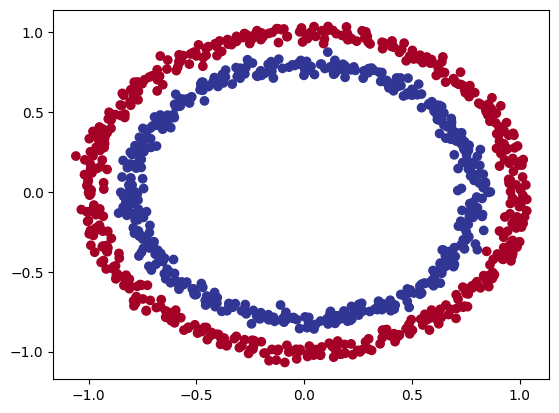

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

[TensorFlow Playground](https://playground.tensorflow.org/)

In [ ]:
# Check the shapes of our features and samples
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples are we working with
len(X), len(y)

(1000, 1000)

In [ ]:
#View the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create the model or import the model
2. Compile the model
3. Fit the model
4. Evaluate
5. Tweak
6. Evaluate
...

In [ ]:
import tensorflow as tf

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.binary_crossentropy, # new loss function
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

# 3. Fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 634us/step - loss: 6.3004 - accuracy: 0.4930
Epoch 2/5
32/32 [==============================] - 0s 556us/step - loss: 6.2438 - accuracy: 0.4820
Epoch 3/5
32/32 [==============================] - 0s 597us/step - loss: 5.0134 - accuracy: 0.5340
Epoch 4/5
32/32 [==============================] - 0s 601us/step - loss: 5.0201 - accuracy: 0.5360
Epoch 5/5
32/32 [==============================] - 0s 601us/step - loss: 5.0187 - accuracy: 0.5350


In [ ]:
# Lets try and improve out model by training for longer
model_1.fit(X,y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 551us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and out model is getting around 50% accuracy, its performing as if it is guessing.

Lets try and add a layer and run it for 200 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Fit the model
model_2.fit(X,y,epochs=200,verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 601us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934747695922852, 0.5]

Our model is still getting guessing results even with 2 layers.



## Improving our model

1. **Create the model or import the model** - we might add more layers or increase the number of hidden units within a layer.
2. **Compile the model** - we might chose a different optimization function such as Adam instead of SGD
3. **Fit the model** - we might fit our model for more epochs
4. **Evaluate**
5. **Tweak**
6. **Evaluate and repeat**

Ways to improve:
> 1. Adding Layers
> 2. Increase the number of hidden units
> 3. Change the activation functions
> 4. Change the optimization function
> 5. Change the learning rate
> 6. Fitting on more data
> 7. Fitting for longer

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time with 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add 100 dense neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # Change to Adam
    metrics=["accuracy"]
)

# 3. Fit the model
model_3.fit(X,y,epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 776us/step - loss: 2.4503 - accuracy: 0.4570
Epoch 2/100
32/32 [==============================] - 0s 728us/step - loss: 0.7130 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 676us/step - loss: 0.6960 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 651us/step - loss: 0.6956 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 683us/step - loss: 0.6952 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 665us/step - loss: 0.6961 - accuracy: 0.4470
Epoch 7/100
32/32 [==============================] - 0s 652us/step - loss: 0.6951 - accuracy: 0.5120
Epoch 8/100
32/32 [==============================] - 0s 685us/step - loss: 0.6952 - accuracy: 0.5150
Epoch 9/100
32/32 [==============================] - 0s 697us/step - loss: 0.6990 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 662us/step - loss: 0.6943 - accura

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 601us/step - loss: 0.7038 - accuracy: 0.5050


[0.7037979960441589, 0.5049999952316284]

**Adding another layer and increasing hidden units did not work**

To visualize our model's predictions, let's create a function `plot_decision_boundary()`

This function will:
* Take in a trained model, features (X), and labels (y)
* Create a meshgrid of the different X values
* Make predictions accross the meshgrid
* Plot the predictions as well as a line between the different zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() -0.1, X[:,1].max() + 0.1

  #Create the meshgrid
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))

  # Create X value (to make predictions on)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together into 1D

  # Make predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 493us/step
doing binary classification


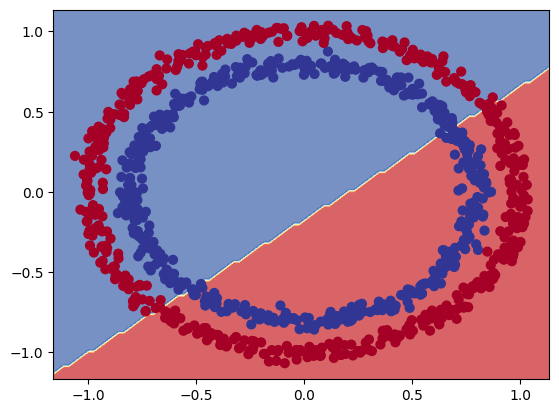

In [ ]:
#Check out the predictions out model is making
plot_decision_boundary(
    model=model_3,
    X=X,
    y=y)

In [ ]:
# Lets see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X+100

# Split out regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: ignored

STOP... We compiled out model for a binary classification problem,

We are now working in a regression problem, lets change the model to suit the regression data.

In [ ]:
#Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time with 3 layers)
model_3_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # Add 100 dense neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, but this time with a regression specific loss function
model_3_reg.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(), # Change to Adam
    metrics=["mae"]
)

# 3. Fit the model
model_3_reg.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X_reg_train)

ValueError: ignored

2/2 [==============================] - 0s 1000us/step


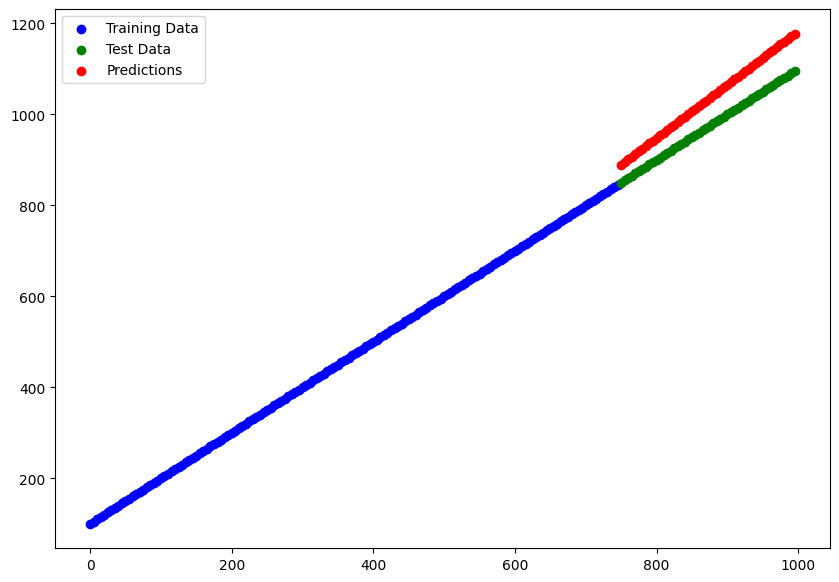

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3_reg.predict(X_reg_test)

# PLot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: **Non-linearity**

In [ ]:
# Recreating a linear activations example created in TensorFlow playground

#Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile our model
model_4.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit our model
history_4 = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 667us/step - loss: 4.3293 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 592us/step - loss: 4.1769 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 616us/step - loss: 4.0560 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 640us/step - loss: 3.8886 - accuracy: 0.4520
Epoch 5/100
32/32 [==============================] - 0s 586us/step - loss: 3.7489 - accuracy: 0.4270
Epoch 6/100
32/32 [==============================] - 0s 589us/step - loss: 3.7057 - accuracy: 0.4230
Epoch 7/100
32/32 [==============================] - 0s 597us/step - loss: 3.6616 - accuracy: 0.4220
Epoch 8/100
32/32 [==============================] - 0s 583us/step - loss: 3.6080 - accuracy: 0.4170
Epoch 9/100
32/32 [==============================] - 0s 597us/step - loss: 3.5451 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 574us/step - loss: 3.4622 - accura

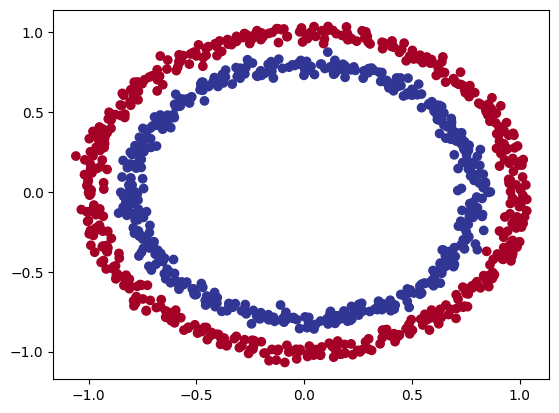

In [ ]:
# Check out our data
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 442us/step
doing binary classification


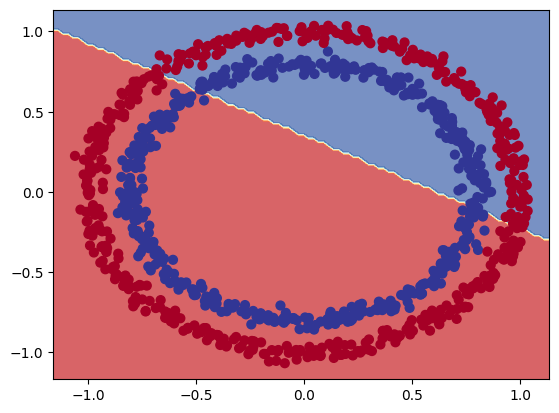

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(
    model=model_4,
    X=X,
    y=y
)

Let's try to build out first neural network with a non-linear activation function

In [ ]:
# set seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_5 = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 706us/step - loss: 4.3357 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 648us/step - loss: 4.0659 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 638us/step - loss: 3.7710 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 610us/step - loss: 3.4179 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 615us/step - loss: 2.7793 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 615us/step - loss: 1.9484 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 624us/step - loss: 1.1714 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 635us/step - loss: 1.1137 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 603us/step - loss: 1.0835 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 634us/step - loss: 1.0601 - accura

313/313 [==============================] - 0s 450us/step
doing binary classification


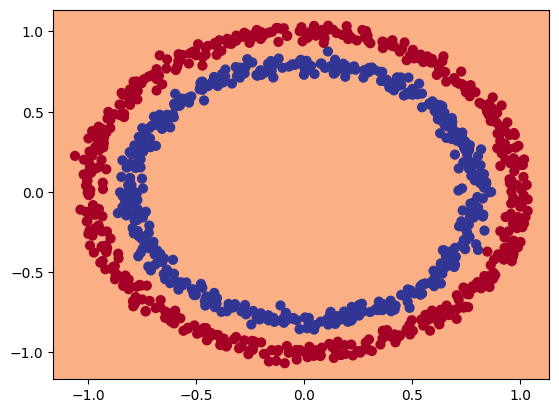

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(
    model=model_5,
    X=X,
    y=y
)

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code

#set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 3. Fit the model
history_6 = model_6.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 780us/step - loss: 1.5304 - accuracy: 0.4440
Epoch 2/250
32/32 [==============================] - 0s 741us/step - loss: 1.0019 - accuracy: 0.4270
Epoch 3/250
32/32 [==============================] - 0s 702us/step - loss: 0.9595 - accuracy: 0.4260
Epoch 4/250
32/32 [==============================] - 0s 661us/step - loss: 0.9350 - accuracy: 0.4200
Epoch 5/250
32/32 [==============================] - 0s 678us/step - loss: 0.9155 - accuracy: 0.4040
Epoch 6/250
32/32 [==============================] - 0s 696us/step - loss: 0.8982 - accuracy: 0.3920
Epoch 7/250
32/32 [==============================] - 0s 643us/step - loss: 0.8826 - accuracy: 0.3860
Epoch 8/250
32/32 [==============================] - 0s 646us/step - loss: 0.8690 - accuracy: 0.3730
Epoch 9/250
32/32 [==============================] - 0s 663us/step - loss: 0.8546 - accuracy: 0.3680
Epoch 10/250
32/32 [==============================] - 0s 662us/step - loss: 0.8393 - accura

In [ ]:
# Evalute the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 582us/step - loss: 0.0740 - accuracy: 0.9750


[0.07396727055311203, 0.9750000238418579]

313/313 [==============================] - 0s 484us/step
doing binary classification


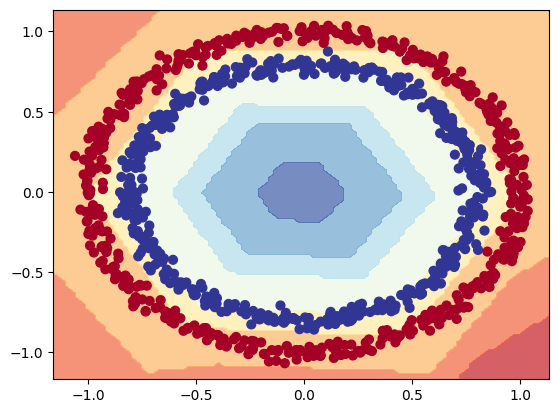

In [ ]:
# How do our model predictions look
plot_decision_boundary(model_6,X,y)

In [ ]:
# Lets change the activation of output layer

#set seed
tf.random.set_seed(42)

# 1. create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    # tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1, activation="softmax") # change to softmax activation for the output layer
    tf.keras.layers.Dense(1, activation="sigmoid") # Change the activation to sigmoid
])

# 2. Compile the model
model_7.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)


# 3. Fit the model
history_7 = model_7.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 761us/step - loss: 0.6952 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 667us/step - loss: 0.6942 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 695us/step - loss: 0.6934 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 637us/step - loss: 0.6927 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 662us/step - loss: 0.6921 - accuracy: 0.5020
Epoch 6/100
32/32 [==============================] - 0s 673us/step - loss: 0.6915 - accuracy: 0.5010
Epoch 7/100
32/32 [==============================] - 0s 613us/step - loss: 0.6906 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 602us/step - loss: 0.6901 - accuracy: 0.5070
Epoch 9/100
32/32 [==============================] - 0s 631us/step - loss: 0.6892 - accuracy: 0.5040
Epoch 10/100
32/32 [==============================] - 0s 613us/step - loss: 0.6884 - accura

In [ ]:
# Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 613us/step - loss: 0.2381 - accuracy: 0.9740


[0.2381054162979126, 0.9739999771118164]

313/313 [==============================] - 0s 488us/step
doing binary classification


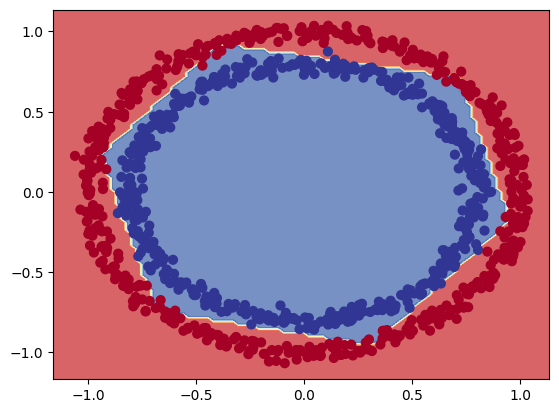

In [ ]:
# Lets visualize this AWESOME adjustment

plot_decision_boundary(
    model=model_7,
    X=X,
    y=y
)

❓❓❓ **Question** Whats wrong with the predictions we made?

**ANSWER:** We trained and tested on the same dataset


🗝️ **NOTE:** The combination of **linear and non-linear functions** is one of the key fundamentals of neural networks.

Now we've looked at linear and non-linear functions, lets see them in action

In [ ]:
#Create a toy tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

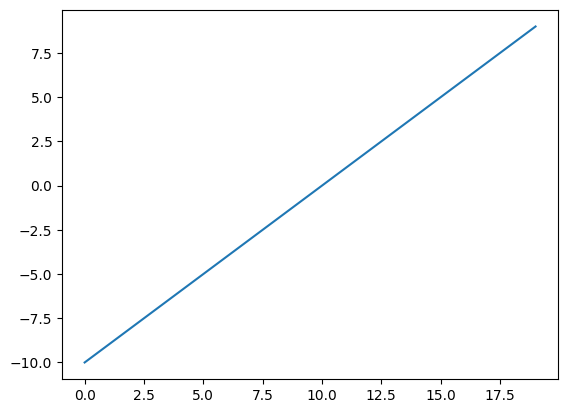

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's replicate Sigmoid

def sigmoid(x):
  return 1 / (1+tf.exp(-x))

In [ ]:
# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

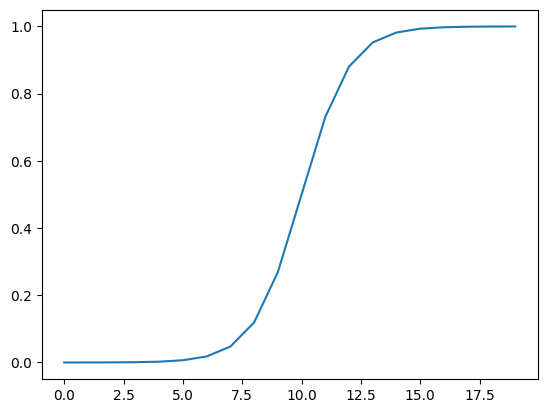

In [ ]:
# plot our toy tensor tranformed by sigmoid()
plt.plot(sigmoid(A))

Values are normalized between 0-1

In [ ]:
# Lets replicate ReLU

def relu(x):
  return tf.maximum(0,x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

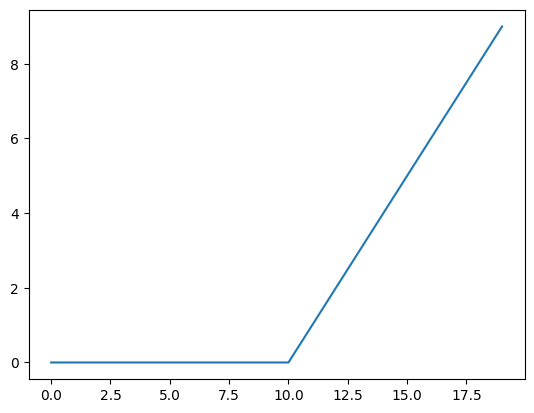

In [ ]:
# Plot our toy tensor tranformed by ReLU
plt.plot(relu(A))

In [ ]:
# Lets try the linear activation function

def linear(x):
  return x

In [ ]:
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

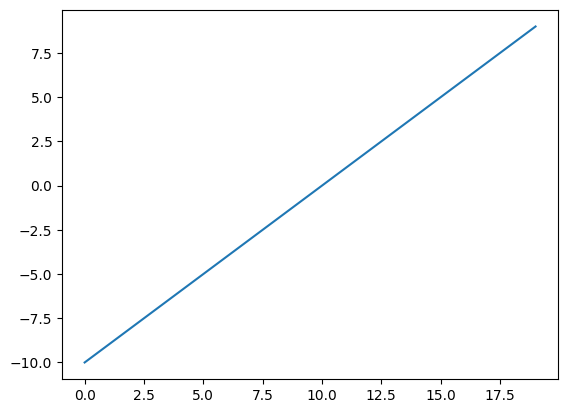

In [ ]:
# Plot our toy tensor transformed by linear
plt.plot(linear(A))

Does the linear activation change anything??????

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

📖**Resource:** [ML Activation Functions Cheat Sheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

## Evaluate and Improve our Classsification Model

We need to utilize training and test data sets:

* Training
* Test

In [ ]:
#Check how many examples we have
len(X)

1000

In [ ]:
# Split into Train and Test data
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:],y[800:]

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Recreate a model to fit on the training data and evaluate on the test data

#set random seed
tf.random.set_seed(42)

# 1.Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Increase the learning rate by 10x
    metrics=["accuracy"]
)

history_8 = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 742us/step - loss: 0.7009 - accuracy: 0.4525
Epoch 2/25
25/25 [==============================] - 0s 710us/step - loss: 0.6869 - accuracy: 0.5175
Epoch 3/25
25/25 [==============================] - 0s 629us/step - loss: 0.6820 - accuracy: 0.5475
Epoch 4/25
25/25 [==============================] - 0s 625us/step - loss: 0.6774 - accuracy: 0.5650
Epoch 5/25
25/25 [==============================] - 0s 668us/step - loss: 0.6702 - accuracy: 0.5950
Epoch 6/25
25/25 [==============================] - 0s 605us/step - loss: 0.6627 - accuracy: 0.5825
Epoch 7/25
25/25 [==============================] - 0s 677us/step - loss: 0.6516 - accuracy: 0.6363
Epoch 8/25
25/25 [==============================] - 0s 663us/step - loss: 0.6411 - accuracy: 0.6988
Epoch 9/25
25/25 [==============================] - 0s 612us/step - loss: 0.6199 - accuracy: 0.7188
Epoch 10/25
25/25 [==============================] - 0s 644us/step - loss: 0.5888 - accuracy: 0.8000

In [ ]:
# 4. Evaluate the model on test datasert
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 918us/step - loss: 0.0969 - accuracy: 0.9900


[0.09688104689121246, 0.9900000095367432]

313/313 [==============================] - 0s 509us/step
doing binary classification
313/313 [==============================] - 0s 481us/step
doing binary classification


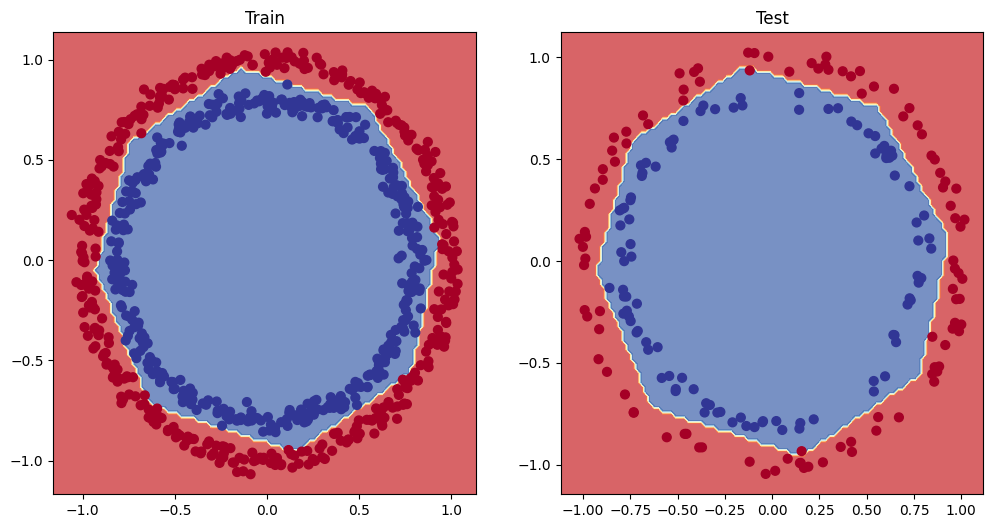

In [ ]:
#Plot the decision boundaries\
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show()

## Plot the loss (or training) curves

In [ ]:
history_8.history

{'loss': [0.7008652687072754,
  0.6868978142738342,
  0.6819993853569031,
  0.6773703694343567,
  0.6702390313148499,
  0.662676215171814,
  0.6515507698059082,
  0.6410835981369019,
  0.6199387311935425,
  0.5887987017631531,
  0.5562222003936768,
  0.5146103501319885,
  0.4684588313102722,
  0.39383140206336975,
  0.3228287398815155,
  0.27013033628463745,
  0.23068450391292572,
  0.20321370661258698,
  0.1826542317867279,
  0.16645927727222443,
  0.14485619962215424,
  0.1289253830909729,
  0.11785639077425003,
  0.11153105646371841,
  0.09972818195819855],
 'accuracy': [0.45249998569488525,
  0.5174999833106995,
  0.5475000143051147,
  0.5649999976158142,
  0.5950000286102295,
  0.5824999809265137,
  0.6362500190734863,
  0.6987500190734863,
  0.71875,
  0.800000011920929,
  0.862500011920929,
  0.8837500214576721,
  0.887499988079071,
  0.9549999833106995,
  0.9725000262260437,
  0.9912499785423279,
  0.9950000047683716,
  0.9925000071525574,
  0.9925000071525574,
  0.985000014305

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.700865,0.45250
1,0.686898,0.51750
2,0.681999,0.54750
3,0.677370,0.56500
4,0.670239,0.59500
5,0.662676,0.58250
6,0.651551,0.63625
7,0.641084,0.69875
8,0.619939,0.71875
9,0.588799,0.80000


Text(0.5, 1.0, 'Model_8 Loss curves')

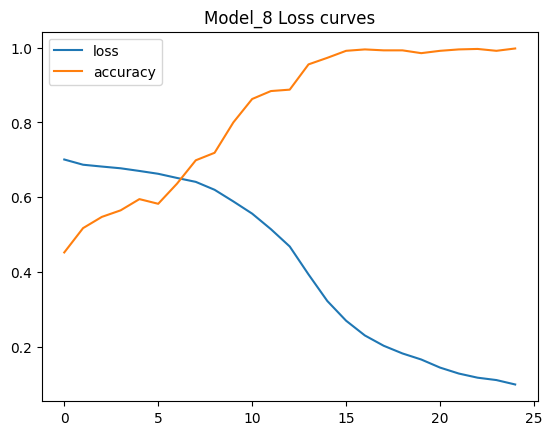

In [ ]:
# PLot the loss curves
pd.DataFrame(history_8.history).plot()
plt.title("Model_8 Loss curves")

🗝️**Note:** For many problems, the lsos function going down means that the loss function is improving. The predictions it is making is getting closer to the ground truth labels

## Finding the best learning rate'

To find the ideal learning rate where the loss decreases the most during training we're going to use the following steps

* Learning Rate **Callback**
* Modify the Loss curves plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create new model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2 Compile the model
model_9.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# Create a Learning Rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (pass lr_scheduler)
history_9 = model_9.fit(X_train,y_train,epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 731us/step - loss: 0.7541 - accuracy: 0.5238 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 678us/step - loss: 0.7520 - accuracy: 0.5250 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 646us/step - loss: 0.7499 - accuracy: 0.5225 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 715us/step - loss: 0.7476 - accuracy: 0.5225 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 693us/step - loss: 0.7451 - accuracy: 0.5163 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 689us/step - loss: 0.7427 - accuracy: 0.5138 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 617us/step - loss: 0.7400 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 717us/step - loss: 0.7373 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: xlabel='epochs'>

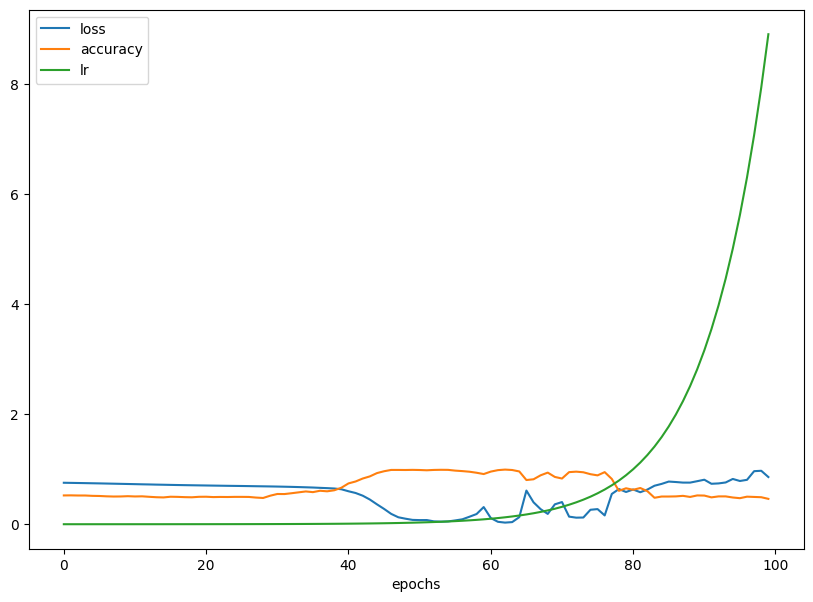

In [ ]:
#Check the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

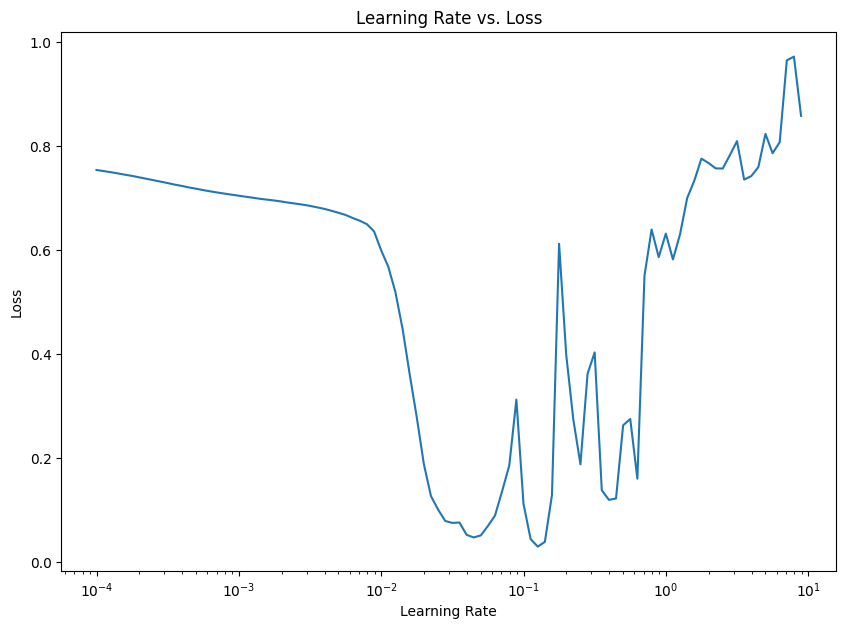

In [ ]:
# PLot the learning rate during training vs loss
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

**Find the lr where the loss decreases the fastest**

In [ ]:
# Example of other typical lr values
10**0, 10**-1, 10**-2,10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

**Lets try building a model based on the optimal learning rate we found above (0.02)**

In [185]:
# set random see
tf.random.set_seed(42)

# 1. Create out model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile out mdoel
model_10.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

history_10 = model_10.fit(X_train,y_train, epochs=20) # 5 less than before

Epoch 1/20
25/25 [==============================] - 0s 714us/step - loss: 0.6925 - accuracy: 0.5075
Epoch 2/20
25/25 [==============================] - 0s 678us/step - loss: 0.6837 - accuracy: 0.5462
Epoch 3/20
25/25 [==============================] - 0s 792us/step - loss: 0.6633 - accuracy: 0.6525
Epoch 4/20
25/25 [==============================] - 0s 732us/step - loss: 0.6112 - accuracy: 0.7812
Epoch 5/20
25/25 [==============================] - 0s 667us/step - loss: 0.5242 - accuracy: 0.8462
Epoch 6/20
25/25 [==============================] - 0s 647us/step - loss: 0.3908 - accuracy: 0.9312
Epoch 7/20
25/25 [==============================] - 0s 609us/step - loss: 0.3038 - accuracy: 0.9413
Epoch 8/20
25/25 [==============================] - 0s 626us/step - loss: 0.2255 - accuracy: 0.9650
Epoch 9/20
25/25 [==============================] - 0s 620us/step - loss: 0.1673 - accuracy: 0.9900
Epoch 10/20
25/25 [==============================] - 0s 642us/step - loss: 0.1348 - accuracy: 0.9912

In [186]:
# Evalute the model_10 on test data
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 752us/step - loss: 0.0570 - accuracy: 0.9850


[0.05698951333761215, 0.9850000143051147]

In [188]:
#Evaluate mode_ 8  on the test data
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0969 - accuracy: 0.9900


[0.09688104689121246, 0.9900000095367432]

313/313 [==============================] - 0s 474us/step
doing binary classification
313/313 [==============================] - 0s 473us/step
doing binary classification


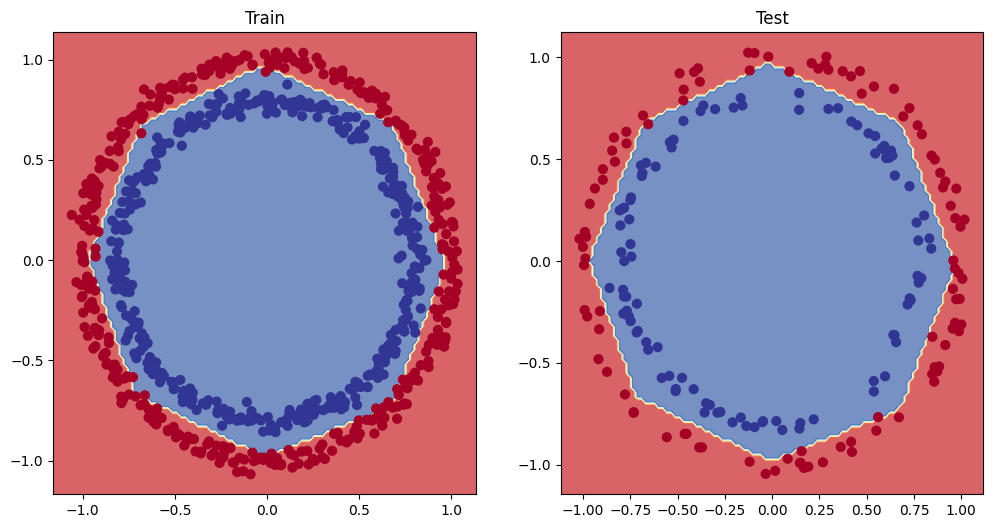

In [190]:
# Plot the decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)

## Classification Evaluation Methods

Alongside visualizing as much as possible, there are a handful of classification evaluation methods & metrics you should be familiar with:

* **Accuracy** - Default metric for classification, but not the best for imbalanced classes
* **Precision** - Higher Precision leads to less *false positives* (improving precision lowers recall)
* **Recall** - Higher recall leads to less *false negatives* (improving recall lowers precision)
* **F1-Score** - Combination of precision and recall, usually a good overall metric for a classification model
* **Confusion Matrix** - When? comparing predictions to truth labels to see where model gets confused. Can be hard to use with large number of classes.
* **Classification report from scikit-learn** - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html



In [191]:
# Check the accuracy of out model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 751us/step - loss: 0.0570 - accuracy: 0.9850
Model loss on the test set: 0.05698951333761215
Model accuracy on the test set: 98.50%


## How about a confusion matrix?

Anatomy of a confusion matrix:
> [TN][FN]

> [FP][TP]


* y-axis: Truth labels
* x-axis: predicted labels
* True positive: model predicts 1 when truth is 1
* True negative: model predicts 0 when truth is 0


In [192]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 667us/step


ValueError: ignored

In [193]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [194]:
y_preds[:10]

array([[9.7451925e-01],
       [9.7451925e-01],
       [9.7451925e-01],
       [9.7451925e-01],
       [8.1260204e-02],
       [5.1839691e-02],
       [9.7451925e-01],
       [3.5106458e-04],
       [9.7451925e-01],
       [1.8365871e-03]], dtype=float32)

OOPS... our predictions array has come out as **prediction probability** form.

The standard output form the sigmoid (or softmax) activation functions.

In [198]:
# Convert our prediction probabilities to binary formnat and view the first 10

tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [199]:
# Create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[98,  3],
       [ 0, 99]], dtype=int64)

## How to better visualize your confusion matrix

Note: the confusion matrix code we are about to write is a remix of the scikit-learns `plot_confusion_matrix` function

In [206]:
import itertools

def plot_confusion_matrix(y_test,y_pred):
  # Create the confusion matrix
  cm = confusion_matrix(y_test,tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:np.newaxis] # Normailize the confusion matrix
  n_classes = cm.shape[0] # number of classes

  # Lets create the visual
  figsize = (10,10)
  fig, ax = plt.subplots(figsize=figsize)

  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(n_classes)

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  #Set x axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust Label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  #Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  #Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15)


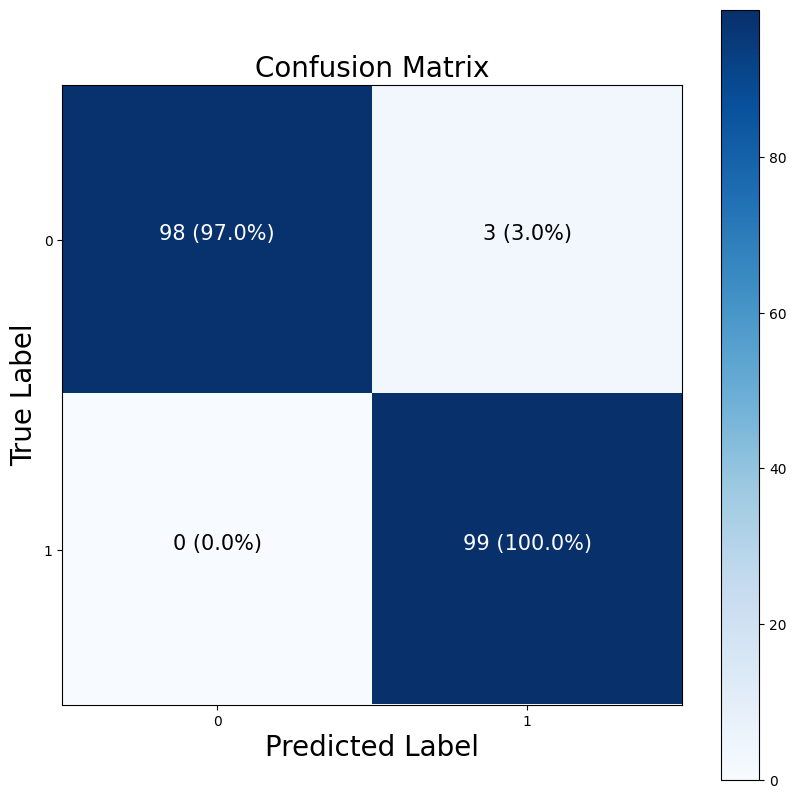

In [207]:
plot_confusion_matrix(y_test=y_test,y_pred=y_preds)